In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
import matplotlib.pyplot as plt
import glob
import tensorflow as tf

In [4]:
def get_section_results(file, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == X_label:
                X.append(v.simple_value)
            elif v.tag == Y_label:
                Y.append(v.simple_value)
    return X, Y


exp_name = "q1_MsPacman-v0_10-10-2022_11-16-30"
logdir = '/home/harvey/Documents/cs285/homework_fall2022/hw3/data/%s/events*'%exp_name
eventfile = glob.glob(logdir)[0]

X_label='Train_EnvstepsSoFar'
Y_label='Train_AverageReturn'

In [5]:
X, Y = get_section_results(eventfile, X_label=X_label, Y_label=Y_label)
for i, (x, y) in enumerate(zip(X, Y)):
    print('Iteration {:d} | Train steps: {:d} | Return: {}'.format(i, int(x), y))

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Iteration 0 | Train steps: 1 | Return: 435.5932312011719
Iteration 1 | Train steps: 10001 | Return: 408.6000061035156
Iteration 2 | Train steps: 20001 | Return: 409.0
Iteration 3 | Train steps: 30001 | Return: 432.3999938964844
Iteration 4 | Train steps: 40001 | Return: 411.5
Iteration 5 | Train steps: 50001 | Return: 468.29998779296875
Iteration 6 | Train steps: 60001 | Return: 461.8999938964844
Iteration 7 | Train steps: 70001 | Return: 460.79998779296875
Iteration 8 | Train steps: 80001 | Return: 481.79998779296875
Iteration 9 | Train steps: 90001 | Return: 464.29998779296875
Iteration 10 | Train steps: 100001 | Return: 449.79998779296875
Iteration 11 | Train steps: 110001 | Return: 475.79998779296875
Iteration 12 | Train steps: 120001 | Return: 479.0
Iteration 13 | Train steps: 130001 | Return: 500.5
Iteration 14 | Train steps: 140001 | Return: 497.6000061035156
Iteration 15 | Train steps: 150001 |

Text(0.5, 1.0, 'q1')

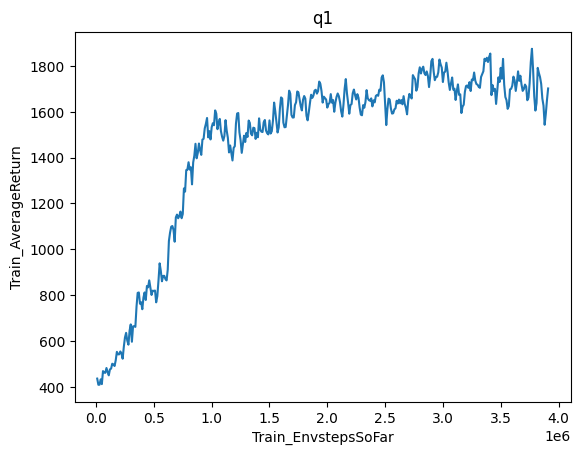

In [6]:
plt.plot(X[1:], Y)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.title("q1")